# Analysing Laptop Data 


### In this file we will clean , analyze , visualize data generate meaningful insights to get appropriate solution to the problem


In [9]:
# importing data and modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df=pd.read_csv(file_path,index_col=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [12]:
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [13]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [14]:
df['Manufacturer'].value_counts()
# The data holds more number of dell laptops

Manufacturer
Dell       71
Lenovo     52
HP         49
Acer       19
Asus       18
Toshiba    17
Samsung     5
MSI         4
Huawei      1
Razer       1
Xiaomi      1
Name: count, dtype: int64

In [15]:
df.replace('?',np.NaN,inplace=True)


In [16]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [17]:
df.describe(include='all')

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
unique,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000


In [18]:
avg=df['Weight_kg'].mean()
df['Weight_kg'].fillna(avg,inplace=True)

C:\Users\Mayank chouhan\AppData\Local\Temp\ipykernel_21796\341872553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].fillna(avg,inplace=True)


In [19]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [20]:
screen_size=df['Screen_Size_cm'].value_counts().idxmax()
df['Screen_Size_cm'].fillna(screen_size,inplace=True)


C:\Users\Mayank chouhan\AppData\Local\Temp\ipykernel_21796\655529372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(screen_size,inplace=True)


In [21]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [22]:
df.head(5)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [23]:
# Standarlising data
df['Screen_Size_inches']=df['Screen_Size_cm']/2.54


In [24]:
df.drop(columns=['Screen_Size_cm'],inplace=True)

In [25]:
df['Weight_pounds']=df['Weight_kg']/2.205
df.drop(columns=['Weight_kg'],inplace=True)


In [26]:
# Normalising the data using normalisation method

df['CPU_frequency']=(df['CPU_frequency']-df['CPU_frequency'].min())/(df['CPU_frequency'].max()-df['CPU_frequency'].min())

In [27]:
# Data bining categorical attribute which splits the values of continous data
bins=np.linspace(df['Price'].min(),df['Price'].max(),4)
labels=['Low','Medium','High']
df['Price_Label']=pd.cut(df['Price'],bins,labels=labels,include_lowest=True)



Text(0.5, 1.0, 'Price data for laptops')

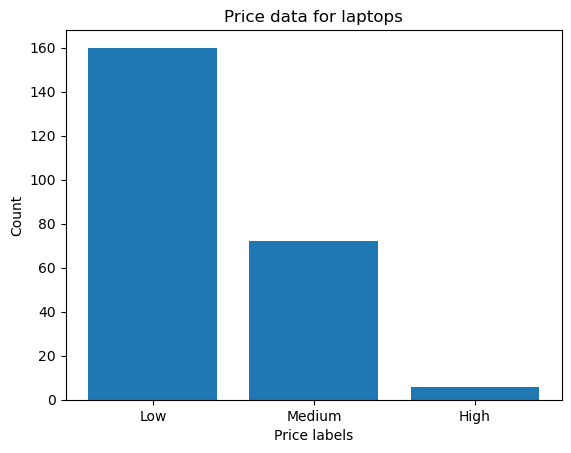

In [28]:
plt.bar(labels,df['Price_Label'].value_counts())
plt.xlabel('Price labels')
plt.ylabel('Count')
plt.title('Price data for laptops')

In [29]:
dummy=pd.get_dummies(df,columns=['Screen'])
dummy.head(5)

,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inches,Weight_pounds,Price_Label,Screen_Full HD,Screen_IPS Panel
0,Acer,4,2,1,5,0.235294,8,256,978,14.0,0.725624,Low,False,True
1,Dell,3,1,1,3,0.470588,4,256,634,15.6,0.997732,Low,True,False
2,Dell,3,1,1,7,0.882353,8,256,946,15.6,0.997732,Low,True,False
3,Dell,4,2,1,5,0.235294,8,128,1244,13.3,0.553288,Low,False,True
4,HP,4,2,1,7,0.352941,8,256,837,15.6,0.866213,Low,True,False


In [30]:
df=dummy
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inches,Weight_pounds,Price_Label,Screen_Full HD,Screen_IPS Panel
0,Acer,4,2,1,5,0.235294,8,256,978,14.0,0.725624,Low,False,True
1,Dell,3,1,1,3,0.470588,4,256,634,15.6,0.997732,Low,True,False
2,Dell,3,1,1,7,0.882353,8,256,946,15.6,0.997732,Low,True,False
3,Dell,4,2,1,5,0.235294,8,128,1244,13.3,0.553288,Low,False,True
4,HP,4,2,1,7,0.352941,8,256,837,15.6,0.866213,Low,True,False


In [31]:
df.to_csv('Laptop_Data.csv',index=False)

In [32]:
df.select_dtypes(include=['int64','float64']).corr()


,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inches,Weight_pounds
Category,1.000000,-0.114174,-0.043378,0.232425,-0.053414,0.030127,0.038246,0.286243,-0.285392,-0.381032
GPU,-0.114174,1.000000,-0.199549,0.145388,0.291439,0.218973,0.094288,0.288298,0.154251,0.262853
OS,-0.043378,-0.199549,1.000000,0.016954,0.050407,-0.074625,0.007751,-0.221730,0.146695,0.120858
CPU_core,0.232425,0.145388,0.016954,1.000000,0.242722,0.473075,0.400015,0.459398,0.041092,0.068599
CPU_frequency,-0.053414,0.291439,0.050407,0.242722,1.000000,0.226736,0.035557,0.366666,-0.000948,0.066522
RAM_GB,0.030127,0.218973,-0.074625,0.473075,0.226736,1.000000,0.361469,0.549297,0.018194,0.055068
Storage_GB_SSD,0.038246,0.094288,0.007751,0.400015,0.035557,0.361469,1.000000,0.243421,0.119699,0.112519
Price,0.286243,0.288298,-0.221730,0.459398,0.366666,0.549297,0.243421,1.000000,-0.110644,-0.050312
Screen_Size_inches,-0.285392,0.154251,0.146695,0.041092,-0.000948,0.018194,0.119699,-0.110644,1.000000,0.797534
Weight_pounds,-0.381032,0.262853,0.120858,0.068599,0.066522,0.055068,0.112519,-0.050312,0.797534,1.000000


<Axes: xlabel='Category', ylabel='Price'>

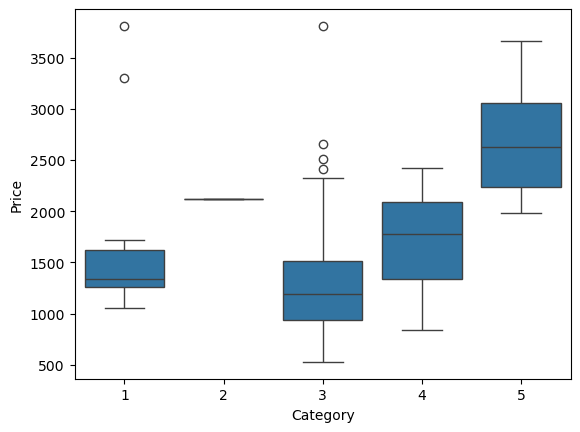

In [33]:
sns.boxplot(x='Category',y='Price',data=df)

          RAM_GB     Price
RAM_GB  1.000000  0.549297
Price   0.549297  1.000000


(0.0, 16.6)

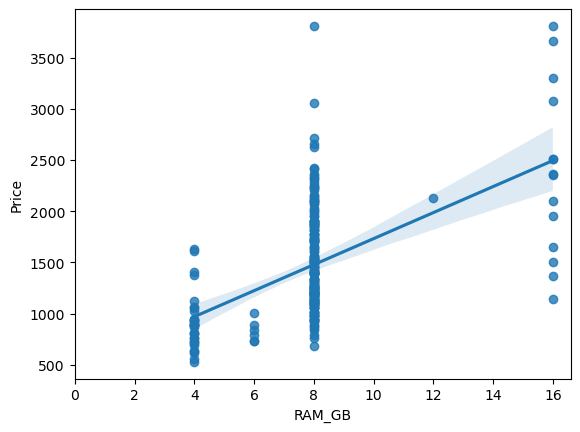

In [50]:
sns.regplot(x='RAM_GB',y='Price',data=df)
print(df[['RAM_GB','Price']].corr())
plt.xlim(0)

In [40]:
from scipy import stats
data=df.select_dtypes(include=['int64','float64']).columns.values.tolist()

for col in data:
    pearson_r,p_value=stats.pearsonr(df[col],df['Price'])
    print(f'The pearson coorelation for {col} with price is {pearson_r} and p_value is {p_value}')


The pearson coorelation for Category with price is 0.2862427558126413 and p_value is 7.225696235806733e-06
The pearson coorelation for GPU with price is 0.2882981988881428 and p_value is 6.166949698364282e-06
The pearson coorelation for OS with price is -0.2217298011482738 and p_value is 0.0005696642559246749
The pearson coorelation for CPU_core with price is 0.45939777733551157 and p_value is 7.912950127009034e-14
The pearson coorelation for CPU_frequency with price is 0.36666555892588604 and p_value is 5.5024633507134225e-09
The pearson coorelation for RAM_GB with price is 0.5492972971857841 and p_value is 3.6815606288429613e-20
The pearson coorelation for Storage_GB_SSD with price is 0.2434207552181029 and p_value is 0.00014898923191724174
The pearson coorelation for Price with price is 0.9999999999999998 and p_value is 0.0
The pearson coorelation for Screen_Size_inches with price is -0.11064420817118281 and p_value is 0.08853397846830766
The pearson coorelation for Weight_pounds wi

Text(0.5, 1.0, 'Based on different category total count of laptops')

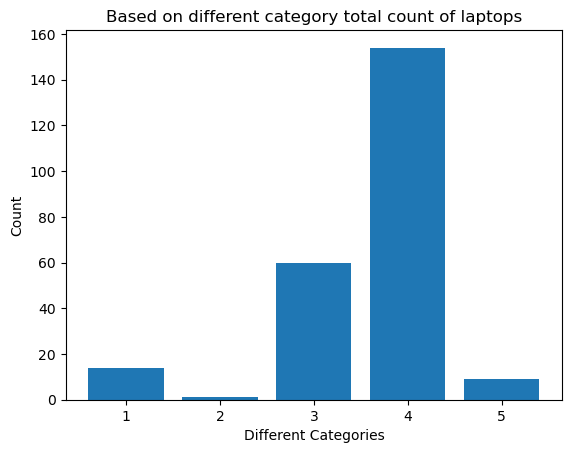

In [48]:
labelss=df['Category'].unique().tolist()
plt.bar(labelss,df['Category'].value_counts())
plt.xlabel('Different Categories')
plt.ylabel('Count')
plt.title('Based on different category total count of laptops')

In [57]:
df_gptest=df[['GPU','CPU_core','Price']]
grouped_text1=df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_text1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [60]:
grouped_pivot=grouped_text1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


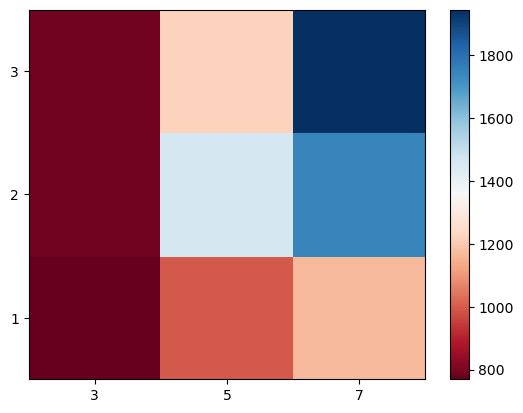

In [61]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)